<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descriptive
1. Jenis apa saja yang ditawarkan oleh prudensial dan jenis asuransi apa yang paling banyak digunakan
2. Dikisaran umur berapa pengguna asuransi di prudensial




In [ ]:
#@title Jika Import file dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title Kelompok 1 (Prudential)
nama_kelompok = ("Andhi","Deka","Dimas","Ditha","Dwi")
print(nama_kelompok)

('Andhi', 'Deka', 'Dimas', 'Ditha', 'Dwi')


# Data Import

In [4]:
#memasukkan data 
import pandas as pd
import numpy as np
path = ("train.csv")
df=pd.read_csv(path)


In [5]:
df.describe(include='all')

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,31130.000000,31130.000000,31130,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31119.000000,31130.000000,31130.000000,27463.000000,31130.000000,25395.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,31130.000000,17855.000000,31130.000000,31130.000000,31130.000000,31130.000000,16141.000000,13184.000000,21040.000000,9233.000000,26398.000000,31130.000000,...,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000
unique,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20725.647960,1.026245,NaN,24.409316,0.328189,2.007581,2.669129,1.042371,0.405728,0.706803,0.292013,0.469030,0.077319,8.622615,1.302859,0.006364,2.144394,0.362417,1.209669,2.007164,5.848956,2.886091,1.028204,1.411532,1.037970,1.729393,1.057212,2.149117,1.957501,0.001670,1.899550,2.053068,2.417828,2.687729,0.475130,0.497709,0.444865,0.485421,8.003485,253.216094,...,0.037200,0.058145,0.010312,0.005461,0.008224,0.189438,0.012272,0.010055,0.006971,0.009573,0.008256,0.014649,0.037746,0.097176,0.018086,0.087121,0.013299,0.012336,0.015934,0.011918,0.025892,0.010569,0.020913,0.022359,0.020784,0.007517,0.010569,0.06

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Columns: 128 entries, Id to Response
dtypes: float64(102), int64(25), object(1)
memory usage: 30.4+ MB


In [7]:
feature_numerik = [col for col in df.columns if df[col].dtype!='object'] 
feature_kategorik = [col for col in df.columns if df[col].dtype=='object']
print('feature numerik antara lain : ', feature_numerik)
print()
print('feature kategorik antara lain : ', feature_kategorik)

feature numerik antara lain :  ['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_Hi

In [8]:
responsex = df[['Response']]
responsex.describe()

,Response
count,31129.000000
mean,5.639854
std,2.462657
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,8.000000


# Data Preparation

In [9]:

missing_data = df.isnull()
missing_data.head(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,Fals

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Id
False    31130
Name: Id, dtype: int64

Product_Info_1
False    31130
Name: Product_Info_1, dtype: int64

Product_Info_2
False    31130
Name: Product_Info_2, dtype: int64

Product_Info_3
False    31130
Name: Product_Info_3, dtype: int64

Product_Info_4
False    31130
Name: Product_Info_4, dtype: int64

Product_Info_5
False    31130
Name: Product_Info_5, dtype: int64

Product_Info_6
False    31130
Name: Product_Info_6, dtype: int64

Product_Info_7
False    31130
Name: Product_Info_7, dtype: int64

Ins_Age
False    31130
Name: Ins_Age, dtype: int64

Ht
False    31130
Name: Ht, dtype: int64

Wt
False    31130
Name: Wt, dtype: int64

BMI
False    31130
Name: BMI, dtype: int64

Employment_Info_1
False    31119
True        11
Name: Employment_Info_1, dtype: int64

Employment_Info_2
False    31130
Name: Employment_Info_2, dtype: int64

Employment_Info_3
False    31130
Name: Employment_Info_3, dtype: int64

Employment_Info_4
False    27463
True      3667
Name: Employment_Info_4, dtype: int64

In [37]:
df= pd.read_csv(path,nrows=10)
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.0,10.000000,9.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.0,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,6.000000,4.000000,7.000000,3.000000,8.00000,10.000000,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000
mean,9.400000,1.0,20.700000,0.173030,2.100000,2.600000,1.0,0.388060,0.667273,0.235356,0.406408,0.087200,7.800000,1.600000,0.0,2.400000,0.459089,1.200000,2.0,5.700000,2.900000,1.0,1.600000,1.0,1.600000,1.0,2.400000,1.900000,0.002345,1.600000,1.900000,2.300000,2.500000,0.461353,0.477941,0.400402,0.571429,5.00000,245.300000,2.100000,...,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.200000
std,4.623611,0.0,7.543209,0.131200,0.316228,0.843274,0.0,0.226354,0.090727,0.083875,0.101866,0.098946,5.072803,0.966092,0.0,0.516398,0.472895,0.421637,0.0,2.057507,0.316228,0.0,0.516398,0.0,0.516398,0.0,0.966092,0.875595,0.002846,0.966092,0.875595,0.483046,0.527046,0.215044,0.130402,0.200979,0.055759,2.77746,204.918981,0.316228,...,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.316228,0.0,0.316228,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.011091
min,2.000000,1.0,10.000000,0.076923,2.000000,1.000000,1.0,0.029851,0.581818,0.131799,0.272288,0.000000,1.000000,1.000000,0.0,2.000000,0.001800,1.000000,2.0,3.000000,2.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.000133,1.000000,1.000000,2.000000,2.000000,0.188406,0.294118,0.084507,0.526786,0.00000,3.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,6.250000,1.0,12.750000,0.076923,2.000000,3.000000,1.0,0.216418,0.600000,0.176255,0.354989,0.027250,3.000000,1.000000,0.0,2.000000,0.050000,1.000000,2.0,3.750000,3.000000,1.0,1.000000,1.0,1.000000,1.0,1.500000,1.000000,0.000667,1.000000,1.000000,2.000000,2.000000,0.333333,0.441176,0.288732,0.540179,4.00000,120.250000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0

In [12]:
headers = ["Product_Info_1","Ins_Age","BMI"]
df = pd.read_csv(path, names = headers)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
kolum = ["Product_Info_1","Ins_Age","BMI"]
df= pd.read_csv(path, usecols=kolum)


,Product_Info_1,Ins_Age,BMI
count,59381.000000,59381.000000,59381.000000
mean,1.026355,0.405567,0.469462
std,0.160191,0.197190,0.122213
min,1.000000,0.000000,0.000000
25%,1.000000,0.238806,0.385517
50%,1.000000,0.402985,0.451349
75%,1.000000,0.567164,0.532858
max,2.000000,1.000000,1.000000


In [29]:
df.describe()

,Product_Info_1,Ins_Age,BMI
count,37354.000000,37354.000000,37354.000000
mean,1.026048,0.405104,0.468844
std,0.159280,0.197073,0.122085
min,1.000000,0.000000,0.000000
25%,1.000000,0.238806,0.384660
50%,1.000000,0.402985,0.449513
75%,1.000000,0.567164,0.531452
max,2.000000,0.925373,1.000000


In [15]:
df.dtypes

Product_Info_1      int64
Ins_Age           float64
BMI               float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Info_1  37354 non-null  int64  
 1   Ins_Age         37354 non-null  float64
 2   BMI             37354 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 875.6 KB


In [17]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,Product_Info_1,Ins_Age,BMI
0,1,0.641791,0.323008
1,1,0.059701,0.272288
2,1,0.029851,0.428780
3,1,0.164179,0.352438
4,1,0.417910,0.424046


In [18]:
missing_data = df.isnull()
missing_data.head(5)

,Product_Info_1,Ins_Age,BMI
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [19]:
kolum2 = ["employment_info_1","employment_info_4","employment_info_6"]
df2= pd.read_csv(path, usecols=kolum)
print(df2)

       Product_Info_1   Ins_Age       BMI
0                   1  0.641791  0.323008
1                   1  0.059701  0.272288
2                   1  0.029851  0.428780
3                   1  0.164179  0.352438
4                   1  0.417910  0.424046
...               ...       ...       ...
37349               1  0.417910  0.281967
37350               1  0.537313  0.444667
37351               2  0.119403  0.443651
37352               1  0.477612  0.477625
37353               1  0.432836  0.438930

[37354 rows x 3 columns]


In [20]:
df2.replace("?", np.nan, inplace = True)
df2.head(5)

,Product_Info_1,Ins_Age,BMI
0,1,0.641791,0.323008
1,1,0.059701,0.272288
2,1,0.029851,0.428780
3,1,0.164179,0.352438
4,1,0.417910,0.424046


In [21]:
missing_data2 = df2.isnull()
missing_data2.head(5)

,Product_Info_1,Ins_Age,BMI
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [22]:
df2.describe()

,Product_Info_1,Ins_Age,BMI
count,37354.000000,37354.000000,37354.000000
mean,1.026048,0.405104,0.468844
std,0.159280,0.197073,0.122085
min,1.000000,0.000000,0.000000
25%,1.000000,0.238806,0.384660
50%,1.000000,0.402985,0.449513
75%,1.000000,0.567164,0.531452
max,2.000000,0.925373,1.000000


In [23]:
df.dropna(subset=["Product_Info_1"], axis=0, inplace= True)

In [24]:
avg_norm_loss = df["Product_Info_1"].astype("float").mean(axis=0)
print("Average of Product_Info_1:", avg_norm_loss)

Average of Product_Info_1: 1.0260480805268513


In [25]:
df["Product_Info_1"].replace(np.nan, avg_norm_loss, inplace=True)

In [26]:
df["Product_Info_1"].tail()

37349    1
37350    1
37351    2
37352    1
37353    1
Name: Product_Info_1, dtype: int64

In [27]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["Product_Info_1"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [28]:
df["Product_Info_1"] = df["Product_Info_1"].astype("int")

# Data Normalization

In [40]:
df["Product_Info_1"] = df["Product_Info_1"]/df["Product_Info_1"].max()

In [41]:
df["Product_Info_1"] = (df["Product_Info_1"]-df["Product_Info_1"].min())/(df["Product_Info_1"].max()-df["Product_Info_1"].min())

In [42]:
df["Product_Info_1"] = (df["Product_Info_1"].mean())/df["Product_Info_1"].std()

In [43]:
df.describe()

,Product_Info_1,Ins_Age,BMI
count,5.938100e+04,59381.000000,59381.000000
mean,1.645241e-01,0.405567,0.469462
std,1.141041e-13,0.197190,0.122213
min,1.645241e-01,0.000000,0.000000
25%,1.645241e-01,0.238806,0.385517
50%,1.645241e-01,0.402985,0.451349
75%,1.645241e-01,0.567164,0.532858
max,1.645241e-01,1.000000,1.000000


# Correlation

(0.0, 1.05)

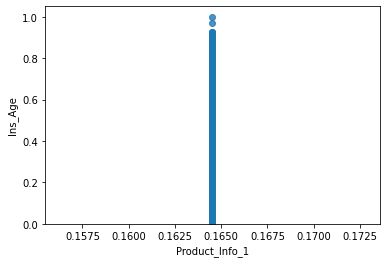

In [45]:
sns.regplot(x="Product_Info_1", y="Ins_Age", data=df)
plt.ylim(0,)

# Data Visualisation

Text(0.5, 1.0, 'Ins_Age bins')

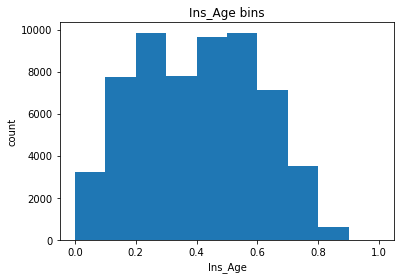

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Ins_Age"])

# set x/y labels and plot title
plt.pyplot.xlabel("Ins_Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Ins_Age bins")

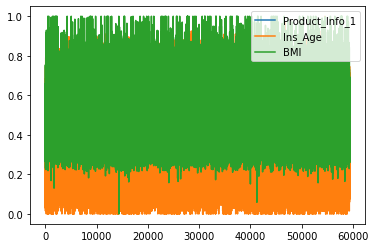

In [59]:
df.plot(kind="line")

In [57]:
df.head()

,Product_Info_1,Ins_Age,BMI,Ins_Age-binned
0,0.164524,0.641791,0.323008,Medium
1,0.164524,0.059701,0.272288,Low
2,0.164524,0.029851,0.428780,Low
3,0.164524,0.164179,0.352438,Low
4,0.164524,0.417910,0.424046,Medium


In [47]:
bins = np.linspace(min(df["Ins_Age"]), max(df["Ins_Age"]), 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [48]:
group_names = ['Low', 'Medium', 'High']

In [49]:
df['Ins_Age-binned'] = pd.cut(df['Ins_Age'], bins, labels=group_names, include_lowest=True )
df[['Ins_Age','Ins_Age-binned']].head(20)

,Ins_Age,Ins_Age-binned
0,0.641791,Medium
1,0.059701,Low
2,0.029851,Low
3,0.164179,Low
4,0.417910,Medium
5,0.507463,Medium
6,0.373134,Medium
7,0.611940,Medium
8,0.522388,Medium
9,0.552239,Medium


In [50]:
df["Ins_Age"].value_counts()

0.537313    1556
0.447761    1551
0.522388    1551
0.223881    1503
0.194030    1481
            ... 
0.895522      18
0.910448      11
0.925373       3
0.970149       1
1.000000       1
Name: Ins_Age, Length: 65, dtype: int64

Text(0.5, 1.0, 'Ins_Age bins')

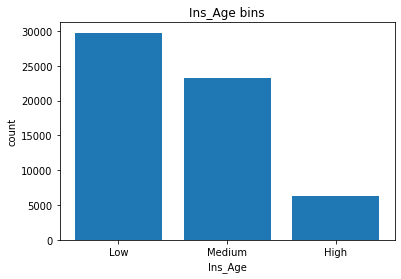

In [51]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Ins_Age-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Ins_Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Ins_Age bins")

Text(0.5, 1.0, 'Ins_Age bins')

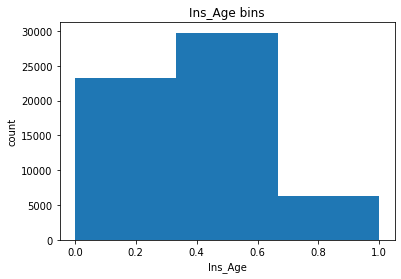

In [63]:
#@title Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Ins_Age"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Ins_Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Ins_Age bins")

In [53]:
df.columns

Index(['Product_Info_1', 'Ins_Age', 'BMI', 'Ins_Age-binned'], dtype='object')

In [54]:
df.isnull().sum()

Product_Info_1    0
Ins_Age           0
BMI               0
Ins_Age-binned    0
dtype: int64

# Specialized Visualization Tools

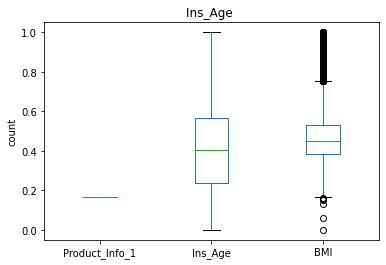

In [66]:
#@title Box Plots
df.plot(kind='box')
plt.ylabel("count")
plt.title("Ins_Age ")
plt.show()